In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import sys
sys.path.append('../helper_classes')
from limit_utils import get_median_sensitivity

# Define the likelihoods and output directories for the configurations
configs = [
    {
        "likelihood": "likelihoods/SI_60t_140ty_mig_0.2-2.0Gev_500toys_40_mu_AC_test.pkl",
        "directory": "outputs/SI_60t_140ty_mig_0.2-2.0Gev_500toys_40_mu_AC_test",
        "label": "XLZD_60t_140ty (Testing AC 8 events/ty)",
        "color": "blue"
    },
     {
        "likelihood": "likelihoods/SI_60t_140ty_mig_0.4-2.0Gev_50toys_20_mu_AC_test_scalingD1k.pkl",
        "directory": "outputs/SI_60t_140ty_mig_0.4-2.0Gev_50toys_20_mu_AC_test_scalingD1k",
        "label": "XLZD_60t_140ty (AC_rate : 1e3 events/ty [Pre-Pessimistic])",
        "color": "black"
    },
       {
        "likelihood": "likelihoods/SI_80t_140ty_mig_0.2-2.0Gev_200toys_25_mu_AC_test_scaling350.pkl",
        "directory": "outputs/SI_80t_140ty_mig_0.2-2.0Gev_200toys_25_mu_AC_test_scaling350",
        "label": "XLZD_80t_140ty (AC_rate : 350 events/ty [DARWIN BG goal])",
        "color": "red"
    },

     {
        "likelihood": "likelihoods/SI_80t_750ty_mig_0.2-2.0Gev_100toys_25_mu_AC_test_scaling350.pkl",
        "directory": "outputs/SI_80t_750ty_mig_0.2-2.0Gev_100toys_25_mu_AC_test_scaling350",
        "label": "XLZD_80t_750ty (AC_rate : 350 events/ty [DARWIN BG goal])",
        "color": "purple"
    },
     {
        "likelihood": "likelihoods/SI_60t_140ty_mig_0.3-2.0Gev_500toys_25_mu_AC_4fold_parallelising_testing.pkl",
        "directory": "outputs/SI_60t_140ty_mig_0.3-2.0Gev_500toys_25_mu_AC_4fold_parallelising_testing",
        "label": "XLZD_60t_140ty (Testing AC-4fold parallel 226 events/ty)",
        "color": "pink"
    },
     
      {
        "likelihood": "likelihoods/SI_40t_140ty_mig_0.3-2.0Gev_1000toys_25_new_mu_4fold.pkl",
        "directory": "outputs/SI_40t_140ty_mig_0.3-2.0Gev_1000toys_25_new_mu_4fold",
        "label": "XLZD_40t_140ty (4-fold-52 AC events/ty @ 240V/cm and 1k toys)",
        "color": "magenta"
    },
    
]

------------------------------------------
Migdal ionisation probabilities
P. Cox, M. Dolan, C. McCabe, H. Quiney (2022)
arXiv:2208.12222
------------------------------------------


/Users/amirr/Desktop/Flame/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(


In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import sys
sys.path.append('../helper_classes')
from limit_utils import get_median_sensitivity

# Define the likelihoods and output directories for the configurations
configs = [
     {
        "likelihood": "likelihoods/SI_40t_140ty_mig_0.3-2.0Gev_1000toys_25_new_mu_4fold.pkl",
        "directory": "outputs/SI_40t_140ty_mig_0.3-2.0Gev_1000toys_25_new_mu_4fold",
        "label": "XLZD_40t_140ty (4-fold-52 AC events/ty @ 240V/cm and 1k toys)",
        "color": "black"
    },
      
]

In [41]:
def get_signal_rates_from_likelihood(likelihood_file, likelihood_module):
    likelihood_class = __import__(likelihood_module, globals(), locals(), [])
    class_names = [name for name in dir(likelihood_class) if isinstance(getattr(likelihood_class, name), type)]
    globals().update({name: getattr(likelihood_class, name) for name in class_names})
    
    likelihood_container = pkl.load(open(likelihood_file, 'rb'))
    signal_expected_mean = likelihood_container.expected_signal_counts
    
    return signal_expected_mean

In [42]:
def scaling_fn(mu, mu_ref):
    return mu / mu_ref * 1e-45

In [43]:
results = []  # List to store data for all configurations

for config in configs:
    # Load the signal expected mean
    signal_expected_mean = get_signal_rates_from_likelihood(config["likelihood"], 'create_simple_template_likelihood')
    
    # Get sensitivity data
    masses, all_bands, mus, pval_curves = get_median_sensitivity(
        directory=config["directory"],
        scaling_fn=scaling_fn,
        signal_name='WIMP0',
        signal_expected_mean=signal_expected_mean,
        return_pval_curves=True
    )
    
    # Convert masses for plotting
    masses_int = np.array([int(float(mass)) for mass in masses]) 
    masses_plot = masses_int * 1e-1  # Scale masses

    # Store the results for this configuration
    results.append({
        "config": config["label"],
        "masses_plot": masses_plot,
        "all_bands": all_bands,
        "mus": mus,
        "color": config["color"]
    })



masses from get sensitivity fn ['03', '04', '06', '08', '10', '12', '14', '16', '18', '20']
Found 1 failed toy for WIMP006; removing...
Found 4 failed toy for WIMP008; removing...
Found 1 failed toy for WIMP012; removing...
Found 2 failed toy for WIMP014; removing...
Found 2 failed toy for WIMP016; removing...
Found 4 failed toy for WIMP018; removing...
Found 3 failed toy for WIMP020; removing...


In [44]:
# Results stores all the relevant data for plotting, can access it's attributes here for different configs:
print(len(results))
print(results[0].keys())

print(results[0]["masses_plot"])
print((results[0]["all_bands"][0][4]))

print(results[1].keys())

print(results[1]["masses_plot"])
print((results[1]["all_bands"][0][4]))

1
dict_keys(['config', 'masses_plot', 'all_bands', 'mus', 'color'])
[0.3 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
8.555541690573116e-41


IndexError: list index out of range

# Saving all results into text files

In [45]:
from tabulate import tabulate
import re  # Add this for sanitizing the filename

# Iterate over all configurations in results
for result in results:
    detector_label = result["config"]
    detector_label = re.sub(r'[^\w\-_\. ]', '_', detector_label) #sanitise labels 
    detector_label = re.sub(r'[\s\-]', '_', detector_label)
    masses = result["masses_plot"]
    all_bands = result["all_bands"]

    filename = f"Migdal_S1_S2_{detector_label}_all_bands.txt"

    # Data for the table
    table_data = []
    for i in range(len(masses)):
        table_data.append([
            f"{masses[i]:.2f}",
            f"{all_bands[0][i]:.6e}",
            f"{all_bands[-1][i]:.6e}",
            f"{all_bands[1][i]:.6e}",
            f"{all_bands[-2][i]:.6e}",
            f"{all_bands[2][i]:.6e}"
        ])

    # Table header
    headers = ["Mass (GeV)", "Median", "-1σ", "+1σ", "-2σ", "+2σ"]

    # Create formatted table
    table_output = tabulate(table_data, headers=headers, tablefmt="grid")

    # Write to file
    with open(filename, "w") as f:
        f.write(table_output)

    print(f"Saved: {filename}")


Saved: Migdal_S1_S2_XLZD_40t_140ty__4_fold_52_AC_events_ty___240V_cm_and_1k_toys__all_bands.txt


# Main Result : Sensitivity Plot

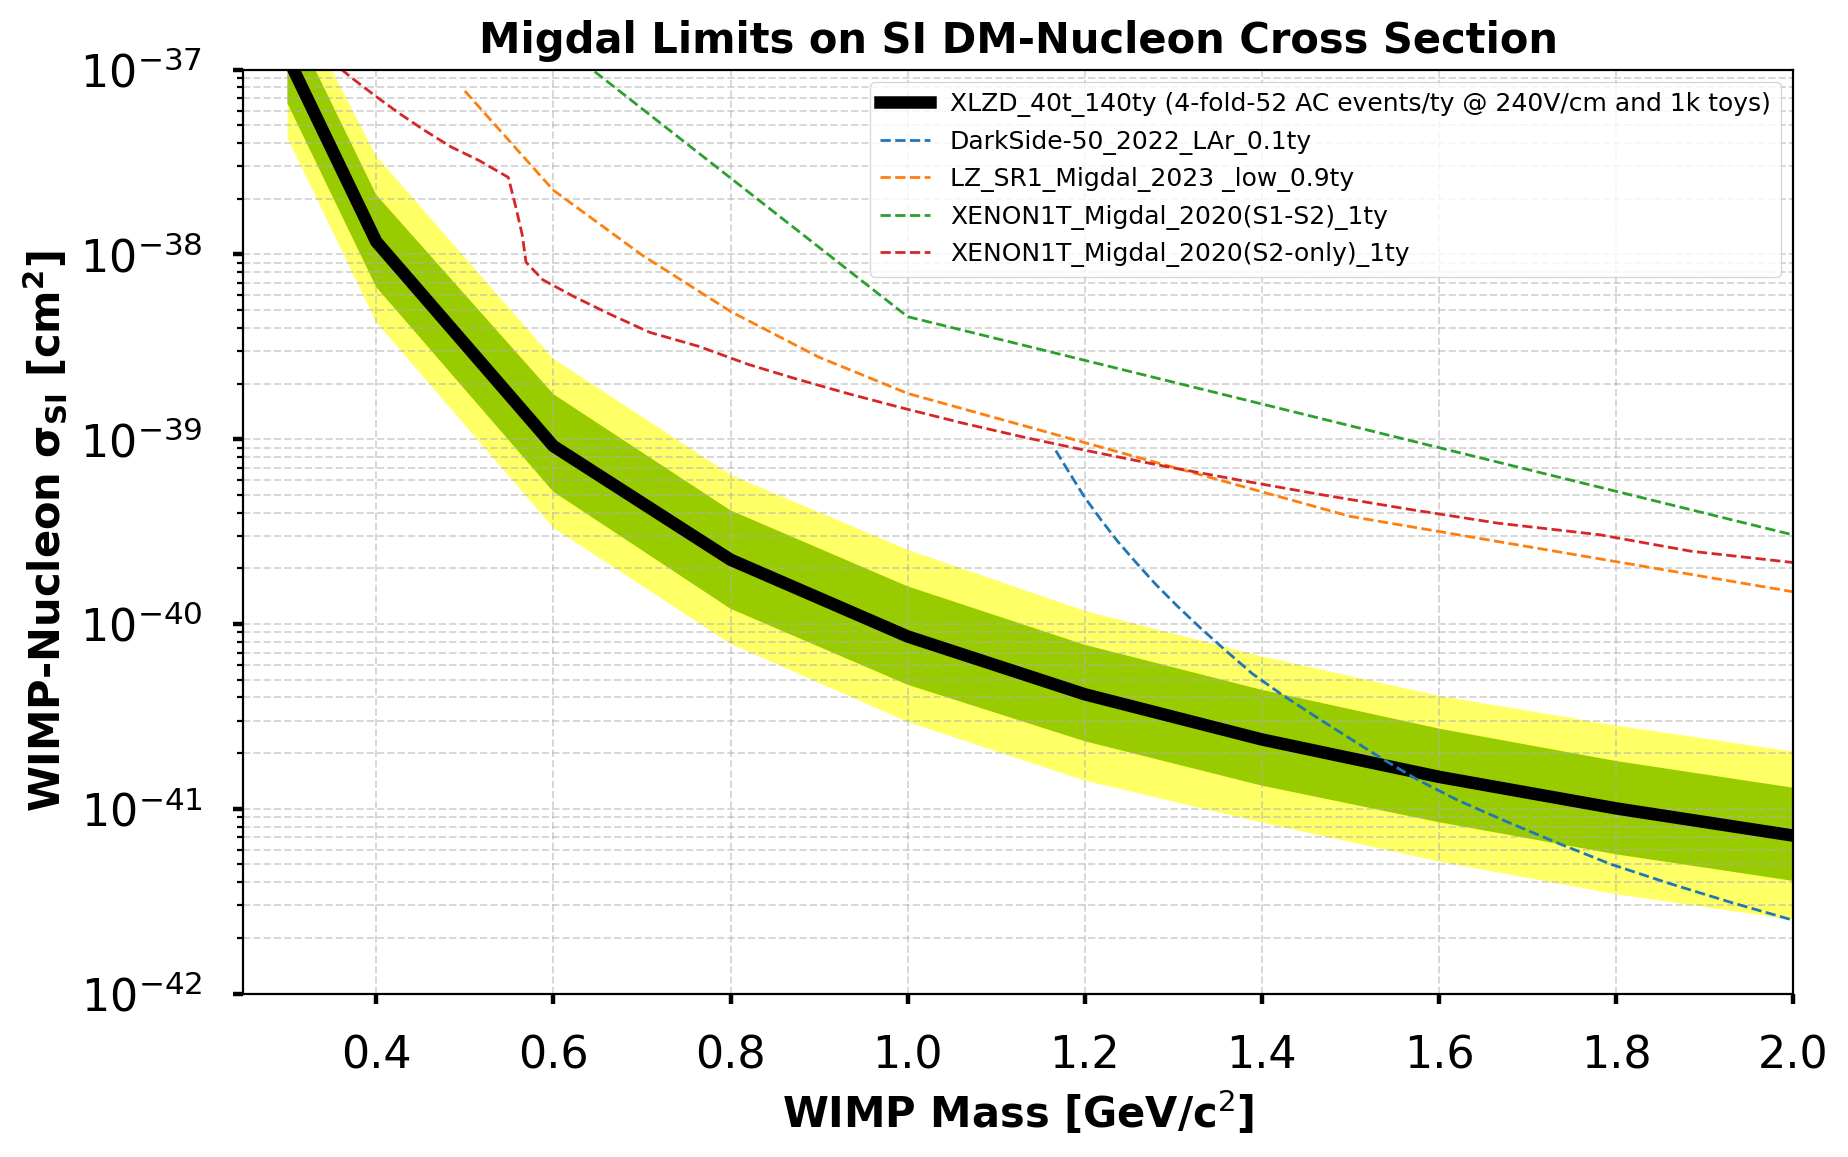

In [46]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)

alpha_values = [1.0, 0.7, 0.4, 0.2]
for idx, result in enumerate(results):
    ax.plot(result["masses_plot"], result["all_bands"][0],
            color=result["color"], lw=4.5,
            alpha=alpha_values[idx % len(alpha_values)],
            label=result["config"])
    ax.fill_between(result["masses_plot"], result["all_bands"][-1], result["all_bands"][1],
                    facecolor="green", lw=2.0, alpha=1.)
    ax.fill_between(result["masses_plot"], result["all_bands"][-2], result["all_bands"][2],
                    facecolor="yellow", lw=2.1, alpha=0.6)

# Data Plotting Function
def plot_data_from_files(master_path, filenames):
    for filename in filenames:
        file_path = os.path.join(master_path, filename)
        if os.path.exists(file_path):
            data = np.loadtxt(file_path)
            x = data[:, 0]
            y = data[:, 1]
            if filename != 'neutrino_fog_low.txt':
                ax.plot(x, y, label=filename.replace('.txt', ''), lw=1, linestyle="--")
            else:
                ax.plot(x, y, color='black', lw=1, linestyle="-.")
                ax.fill_between(x, y, color='lightblue', alpha=0.5)
                ax.text(5, 1e-45, "Neutrino Floor For Xe", color='black', fontsize=12, 
                        ha='left', va='bottom', fontweight='bold')
        else:
            print(f"File {filename} not found in the directory.")
master_path = '/Users/amirr/Desktop/Flame/FlameFitSimple/analyses/Plotting'  # Path to your directory , this data needs to be downloaded from Cirian's GitHub page : https://github.com/cajohare/DirectDetectionPlots/tree/main/data/limits/Nucleon/SI
filenames = ["DarkSide-50_2022_LAr_0.1ty.txt","LZ_SR1_Migdal_2023 _low_0.9ty.txt","XENON1T_Migdal_2020(S1-S2)_1ty.txt","XENON1T_Migdal_2020(S2-only)_1ty.txt"] # List of your filename
plot_data_from_files(master_path, filenames)

# Customization
ax.set_xlabel(r'WIMP Mass [GeV/c$^2$]', fontsize=15, fontweight='bold')
ax.set_ylabel(r'WIMP-Nucleon $\mathbf{\sigma_{\bf{ SI}}}$ [cm$\mathbf{^2}$]', fontsize=15, fontweight='bold')
ax.set_yscale('log')
ax.set_xscale('linear')
ax.set_ylim(1e-42, 1e-37)
ax.set_xlim(0.25, 2.0)
plt.title("Migdal Limits on SI DM-Nucleon Cross Section", fontweight='bold', fontsize=15)
ax.grid(True, which='both', linestyle='--', linewidth=0.7,alpha=0.5)

plt.legend(loc="upper right", fontsize=9)
plt.show()

# Sensitivity plots with error bars 

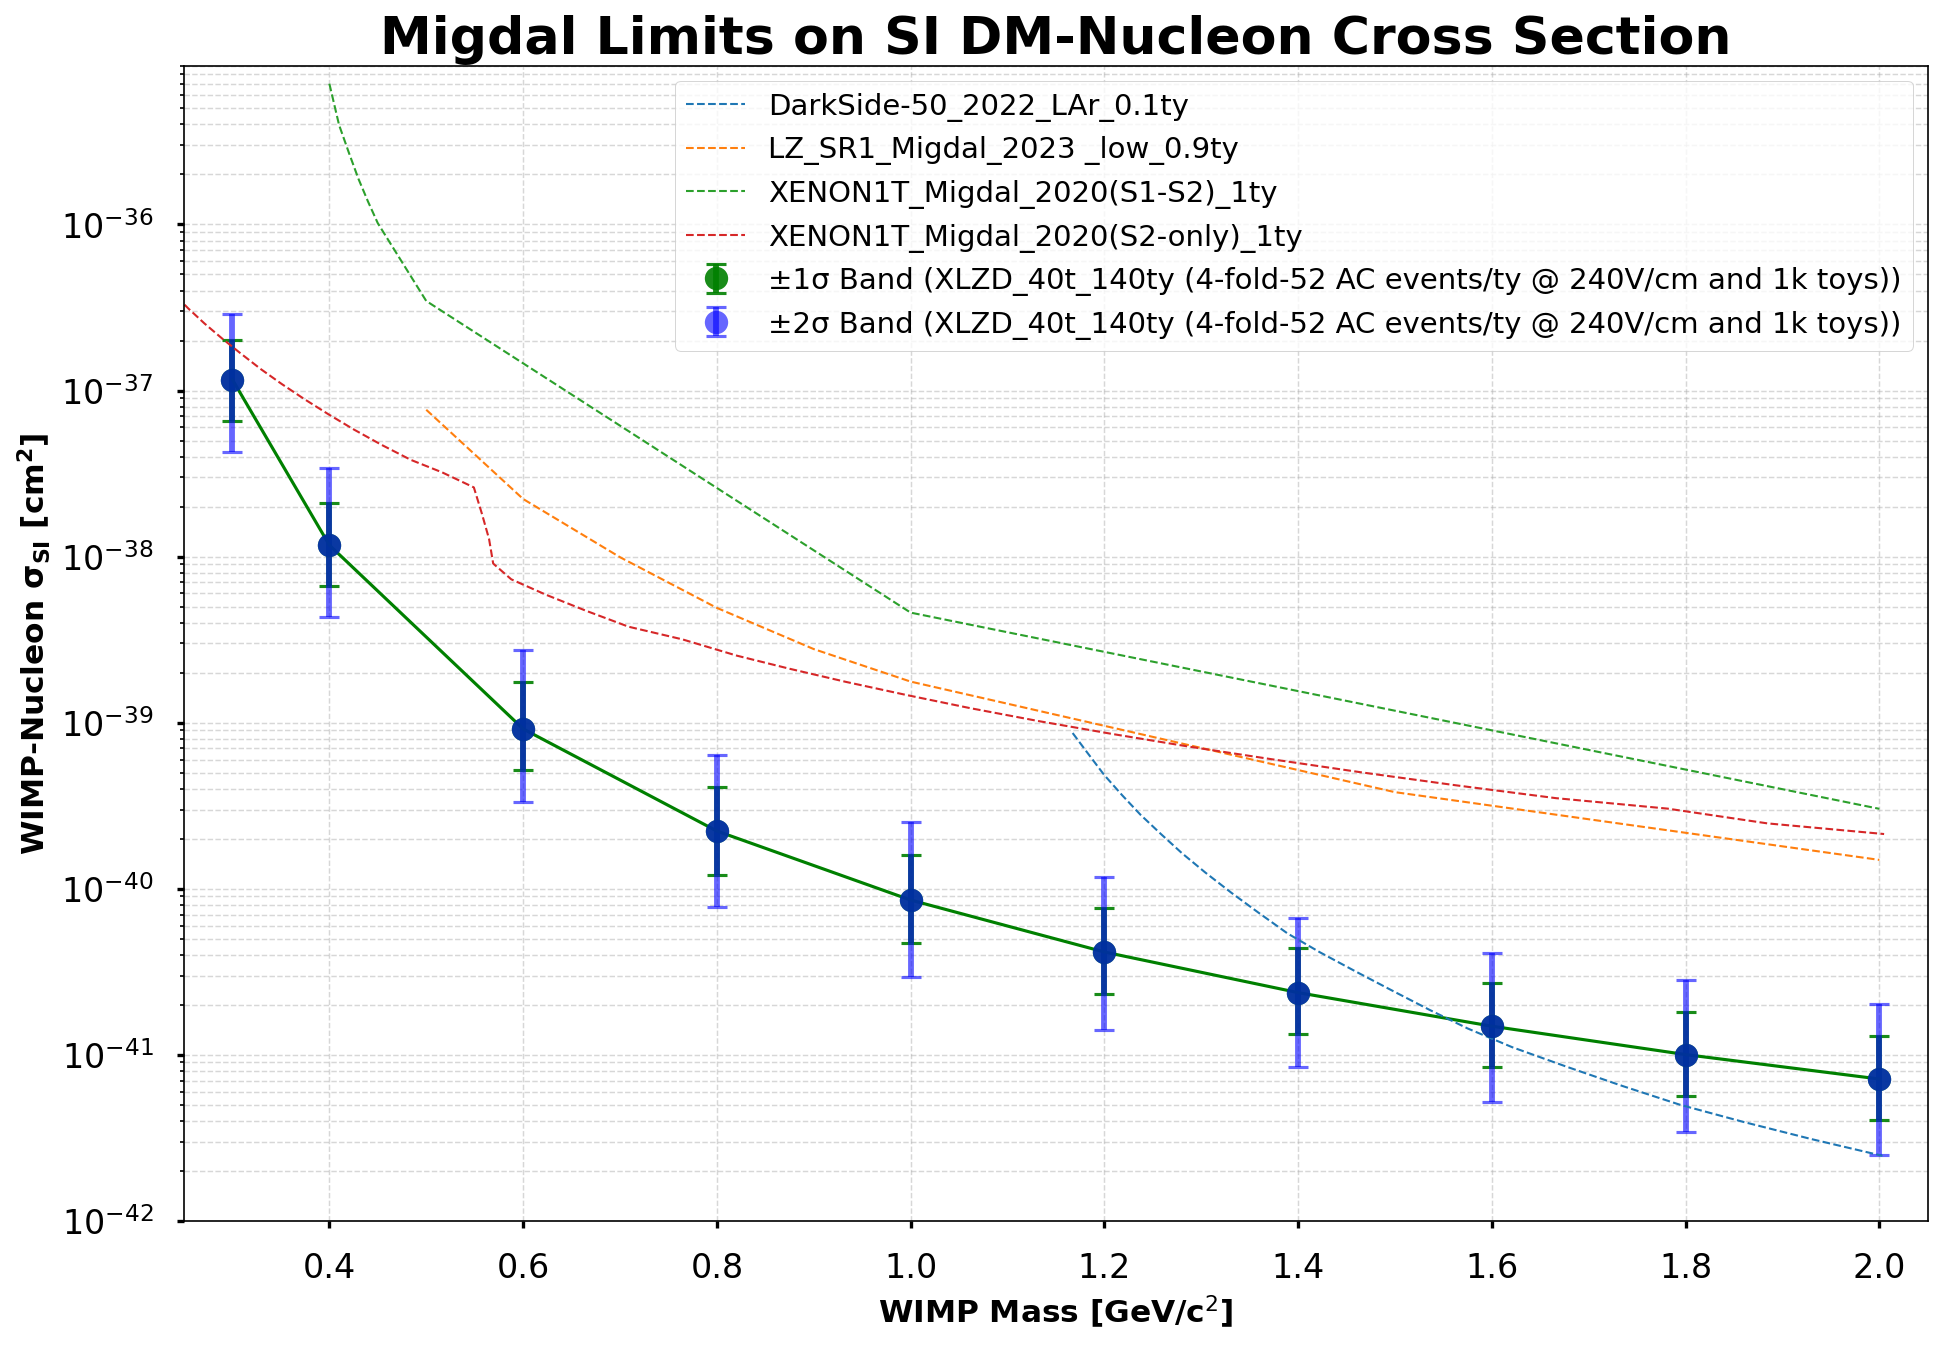

In [48]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(figsize=(15, 10), dpi=150)

alpha_values = [1.0, 0.4, 0.2]

# Define distinct colors and line styles for each detector
errorbar_colors = ['green', 'blue', 'red', 'purple']
line_styles = ['-', '--', '-.', ':']  # Different line styles for each curve

for idx, result in enumerate(results):
    central_curve = result["all_bands"][0]

    # Unique error bar colors for ±1σ band
    ax.errorbar(
        result["masses_plot"], central_curve,
        yerr=[
            central_curve - np.array(result["all_bands"][-1]),
            np.array(result["all_bands"][1]) - central_curve
        ],
        fmt='o', 
        color=errorbar_colors[idx % len(errorbar_colors)],
        capsize=5, 
        capthick=1.5,
        label=f'±1σ Band ({result["config"]})', 
        alpha=0.9
    )

      # Commented out ±2σ band for now
    ax.errorbar(result["masses_plot"], central_curve,
                 yerr=[central_curve - np.array(result["all_bands"][-2]),
                       np.array(result["all_bands"][2]) - central_curve],
                 fmt='o', color=errorbar_colors[(idx + 1) % len(errorbar_colors)],
                 capsize=5, capthick=1.5,
                 label=f'±2σ Band ({result["config"]})', alpha=0.6)

    # Connect central values with distinct line styles
    ax.plot(
        result["masses_plot"], central_curve,
        linestyle=line_styles[idx % len(line_styles)],
        color=errorbar_colors[idx % len(errorbar_colors)],
        lw=1.5
    )

# Data Plotting Function
def plot_data_from_files(master_path, filenames):
    for filename in filenames:
        file_path = os.path.join(master_path, filename)
        if os.path.exists(file_path):
            data = np.loadtxt(file_path)
            x = data[:, 0]
            y = data[:, 1]

            if filename != 'neutrino_fog_low.txt':
                ax.plot(x, y, label=filename.replace('.txt', ''), lw=1, linestyle="--")
            else:
                ax.plot(x, y, color='black', lw=1, linestyle="-.")
                ax.fill_between(x, y, color='lightblue', alpha=0.5)
                ax.text(
                    5, 1e-45, 
                    "Neutrino Floor For Xe", 
                    color='black', 
                    fontsize=12, 
                    ha='left', 
                    va='bottom', 
                    fontweight='bold'
                )
        else:
            print(f"File {filename} not found in the directory.")

# File paths and plotting
master_path = '/Users/amirr/Desktop/Flame/FlameFitSimple/analyses/Plotting'  # Path to your directory , this data needs to be downloaded from Cirian's GitHub page : https://github.com/cajohare/DirectDetectionPlots/tree/main/data/limits/Nucleon/SI
filenames = ["DarkSide-50_2022_LAr_0.1ty.txt","LZ_SR1_Migdal_2023 _low_0.9ty.txt","XENON1T_Migdal_2020(S1-S2)_1ty.txt","XENON1T_Migdal_2020(S2-only)_1ty.txt"] # List of your filename
plot_data_from_files(master_path, filenames)


# Customization
ax.set_xlabel(r'WIMP Mass [GeV/c$^2$]', fontsize=15, fontweight='bold')
ax.set_ylabel(r'WIMP-Nucleon $\mathbf{\sigma_{\bf{ SI}}}$ [cm$\mathbf{^2}$]', fontsize=15, fontweight='bold')
ax.set_yscale('log')
ax.set_xscale('linear')
ax.set_ylim(1e-42, 9e-36)
ax.set_xlim(0.25, 2.05)
plt.title("Migdal Limits on SI DM-Nucleon Cross Section", fontweight='bold', fontsize=25)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.5)

plt.legend(loc="upper right", fontsize=14)
plt.show()


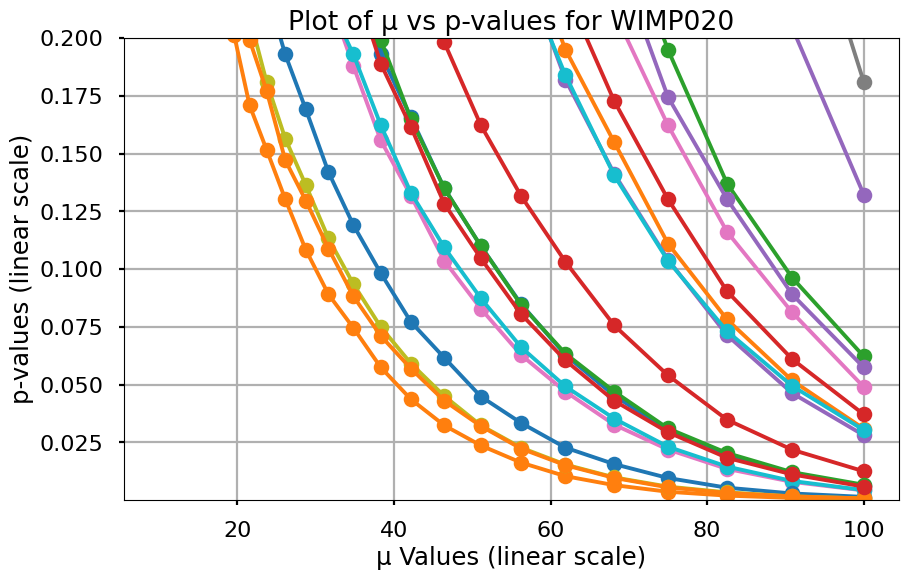

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot multiple rows (toys) for a single WIMP mass
def plot_rows_for_mass(wimp_mass, row_indices):
    plt.figure(figsize=(10, 6))
    for row_index in row_indices:
        mu_values = mus[wimp_mass]
        p_values = pval_curves[wimp_mass][row_index]
        
        # Mask out any NaN values
        valid_indices = ~np.isnan(p_values)
        
        plt.plot(np.array(mu_values)[valid_indices], p_values[valid_indices], 
                 marker='o', label=f'Toy {row_index+1}')
    
    plt.xscale('linear')
    plt.ylim(0.00009,0.20)
    plt.yscale('linear')
    plt.xlabel('μ Values (linear scale)')
    plt.ylabel('p-values (linear scale)')
    plt.title(f'Plot of μ vs p-values for {wimp_mass}')
    #plt.legend()
    plt.grid()
    plt.show()
    
wimp_masses = ['WIMP020']  # WIMP masses to include in the plots
row_indices_to_plot = np.arange(0,25,1)
# Plot multiple rows for each mass
for wimp_mass in wimp_masses:
    plot_rows_for_mass(wimp_mass, row_indices_to_plot)